<h1>Breve Introdução</h1>

<p style="text-align:justify">
O Airbnb começou em 2008, quando dois designers que tinham um espaço sobrando hospedaram três viajantes que procuravam um lugar para ficar. Agora, milhões de anfitriões e viajantes optam por criar uma conta gratuita no Airbnb para que possam anunciar seu espaço e reservar acomodações únicas em qualquer lugar do mundo. Além disso, os anfitriões de experiências do Airbnb compartilham suas paixões e interesses com viajantes e moradores locais.
</p>
<p style="text-align:justify">
O conjunto de dados escolhido, dataset, fornece-nos informações sobre os hosts, a disponibilidade geográfica, as métricas necessárias para fazer previsões e tirar conclusões sobre o preço da hospedagem na cidade de Nova York, NY, no ano de 2019. Segue abaixo uma breve explicação sobre as colunas existentes e o que elas representam:
</p>
<ul>
    <li><b>ID / ID</b> - <i>id do estabelecimento;</i></li>
    <li><b>NAME / NOME</b> - <i>Nome do estabelecimento;</i></li>
    <li><b>HOST_ID / ID DO ANFITRIÃO</b> - <i>id do anfitrião;</i></li>
    <li><b>HOST_NAME / NOME DO ANFITRIÃO</b> - <i>Nome do Anfitrião;</i></li>
    <li><b>NEIGHBOURDHOOD_GROUP / DISTRITO</b> - <i>Nome do Distrito;</i></li>
    <li><b>NEIGHBOURHOOD / BAIRRO</b> - <i>Nome do Bairro;</i></li>
    <li><b>LATITUDE / LATITUDE</b> - <i>Localização medida em graus, de zero a 90 para norte ou para sul, a partir da Linha do Equador;</i></li>
    <li><b>LONGITUDE / LONGITUDE</b> - <i>Localização medida em graus, de zero a 180 para leste ou para oeste, a partir do Meridiano de Greenwich;</i></li>
    <li><b>ROOM_TYPE / TIPO DE QUARTO</b> - <i>Tipo de quarto;</i></li>
    <li><b>PRICE / PREÇO</b> - <i>Preço por noite;</i></li>
    <li><b>MINIMUM_NIGHTS / NÚMERO MÍNIMO DE NOITES</b> - <i>Número mínimo de noites para ficar no estabelecimento;</i></li>
    <li><b>NUMBER_OF_REVIEWS / NÚMERO DE AVALIAÇÕES</b> - <i>Número de avaliações que o estabelecimento recebeu;</i></li>
    <li><b>LAST_REVIEW / ÚLTIMA AVALIAÇÃO</b> - <i>Data da última avaliação que o estabelecimento recebeu;</i></li>
    <li><b>REVIEWS_PER_MONTH / AVALIAÇÕES POR MÊS</b> - <i>Avaliações que o estabelecimento recebeu por mês;</i></li>
    <li><b>CALCULATED_HOST_LISTINGS_COUNT / NÚMERO DE APARTAMENTOS</b> - <i>Número de estabelecimentos que o anfitrião possui;</i></li>
    <li><b>AVAILABILITY_365 / DISPONIBILIDADE</b> - <i>Número de dias que o estabelecimento está disponível durante o ano;</i></li>
</ul>

<h1>Importação das Bibliotecas</h1>

In [1]:
# pandas #(comentar)
import pandas as pd 
from pandas.tools.plotting import scatter_matrix 

# numpy #(comentar)
import numpy as np 

# matplotlib #(comentar)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

# (comentar)
import seaborn as sns

# time (calular tempo gasto nos modelos)
from time import time

# warnings (deixar de poluir o documento com warnings)
import warnings
warnings.filterwarnings('ignore')

# scikit-learn #(comentar)
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, StandardScaler, Imputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

# scikit-learn modelos #(comentar)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#(comentar)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#(comentar)
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

%matplotlib inline 

<h1>Exploração e Preparação do Dataset</h1>

In [2]:
#Realizando a leitura do arquivo csv.
airbnb = pd.read_csv("AB_NYC_2019.csv")

In [3]:
#Quantidade de linhas e colunas contidas no dataset.
airbnb.shape

(48895, 16)

O pacote pandas permite tranformar o nosso dataset em um dataframe, que transforma os dados em uma estrutura de 2 dimensões, linhas e colunas, abaixo podemos visualizar os dados na forma de uma tabela.

In [4]:
#Utilizei a função "head" para obter uma prévia das primeiras 5 linhas do dataframe.
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h1>Limpeza de Dados</h1>

<p style="text-lign:justify">
    Para a análise de dados que desejamos fazer as variáveis id, name, minimum_nights e last_review não são necessárias, portando vamos retirá-las de nosso dataframe.
</p>

In [5]:
#Retirando variáveis desnecessárias.
airbnb = airbnb.drop(columns=["id","host_id","name","host_name","minimum_nights","last_review"])

In [6]:
airbnb.head(2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,0.38,2,355


<p style="text-align:justify">
Um problema muito comum que encontramos ao trabalhar com grandes conjuntos de dados é a existência de valores nulos ou não preenchidos, que podem existir por erros de preenchimento, erros na importação e transformação dos dados, não existência da informação, ou qualquer outro motivo.
</p>

<p style="text-align:justify">
O tratamento que iremos dar para os valores nulos depende do nosso objetivo com a análise de dados, podemos deixar os valores nulos caso eles não impactem negativamente na nossa análise, podemos apagar a linha inteira que possuí um valor nulo, podemos preencher os valores nulos com um valor específico, existem inúmeras formas de tratar valores nulos, mas sempre devemos manter em mente o nosso objetivo com a análise de dados para decidir qual tratativa utilizar.
</p>

<p style="text-align:justify">
Para o nosso trabalho iremos substituir os valores nulos pela mediana correspondente de cada coluna, pois existem muitos outliers que acabam atrapalhando nossa análise.
</p>

In [7]:
#Visualizando a quantidade de valores nulos em cada coluna.
airbnb.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
airbnb = airbnb.fillna(0)

<p style="text-align:justify">
A coluna calculater_host_listing_count possuí valores nulos, mas não será relevante para nossa análise, então podemos deixar os valores dessa coluna na forma original.
</p>

<h1>Visualizando os dados</h1>

<p><b> NUMERO DE REVIEWS Análise do gráfico ~ comentário aqui</b></p>

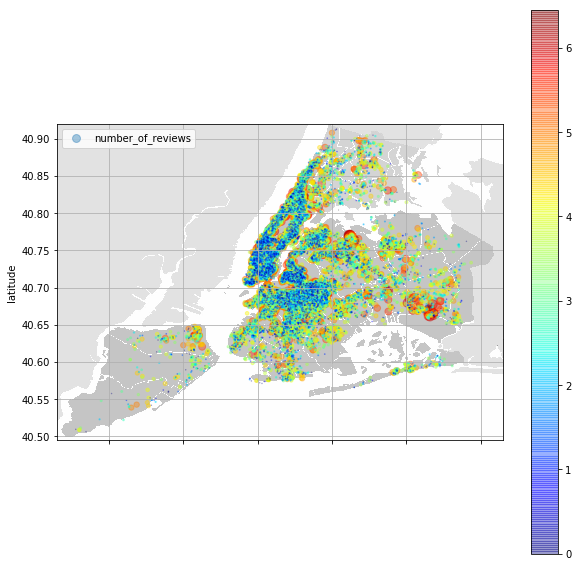

In [9]:
new_york = mpimg.imread('New_York_City_.png',0)

airbnb.plot(kind="scatter", x='longitude', y='latitude', marker="o",
            s=(airbnb["number_of_reviews"]/5), grid=True, colorbar=True, c=np.log(airbnb["number_of_reviews"]), 
            cmap=plt.get_cmap("jet"), figsize=(10,10), label="number_of_reviews", alpha=0.4)

plt.imshow(new_york, alpha=0.4, cmap=plt.get_cmap("jet"), extent=[-74.27, -73.67, 40.495, 40.92])
eixo_x = np.linspace(min(airbnb.longitude), max(airbnb.longitude), 0.3)
plt.xlabel("Longitude")
plt.legend()
plt.title("")
plt.show()

<p><b>PREÇO ~ comentário aqui</b></p>

In [10]:
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [11]:
airbnb.shape

(48895, 10)

In [12]:
airbnb = airbnb.sort_values("price", ascending=True).iloc[int(0.1*airbnb.shape[0]): int(0.9*airbnb.shape[0])].sort_index()

In [13]:
airbnb.shape

(39116, 10)

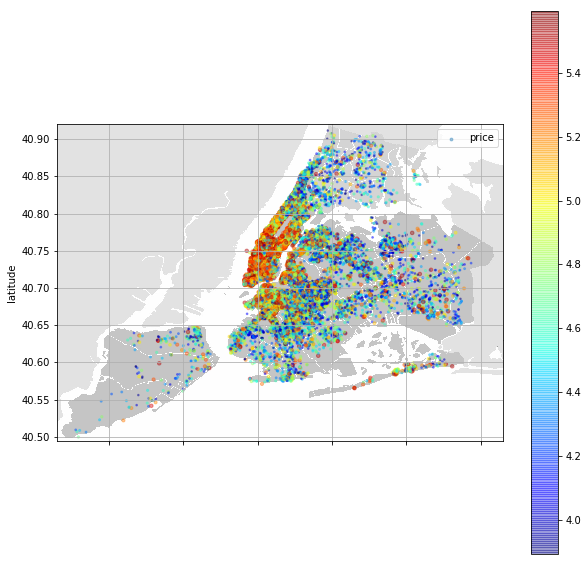

In [14]:
new_york = mpimg.imread('New_York_City_.png',0)

airbnb.plot(kind="scatter", x='longitude', y='latitude', marker="o",
            s=(airbnb["price"])/20, grid=True, colorbar=True, c=np.log(airbnb["price"]), 
            cmap=plt.get_cmap("jet"), figsize=(10,10), label="price", alpha=0.4)

plt.imshow(new_york, alpha=0.4, cmap=plt.get_cmap("jet"), extent=[-74.27, -73.67, 40.495, 40.92])
eixo_x = np.linspace(min(airbnb.longitude), max(airbnb.longitude), 0.3)
plt.xlabel("Longitude")
plt.legend()
plt.title("")
plt.show()

<p><b>distribuição 1 (preço) ~comentário</b></p>

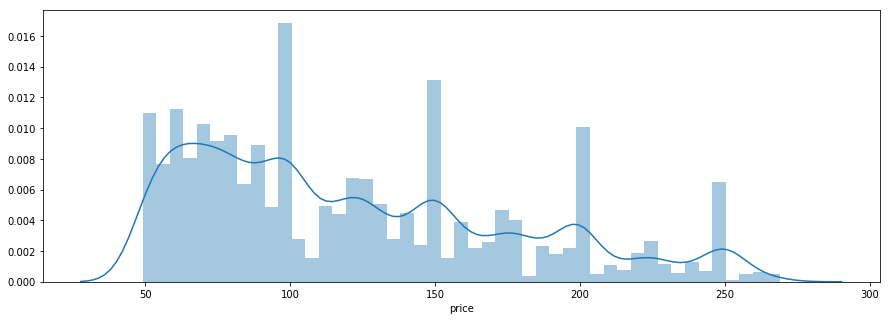

In [15]:
fig = plt.figure(figsize=(15,5))
sns.distplot(airbnb['price']);

In [16]:
airbnb['price'].describe()

count    39116.000000
mean       121.430054
std         55.616790
min         49.000000
25%         75.000000
50%        106.000000
75%        155.000000
max        269.000000
Name: price, dtype: float64

<p><b>distribuição 2 (numero de reviews) ~comentário</b></p>

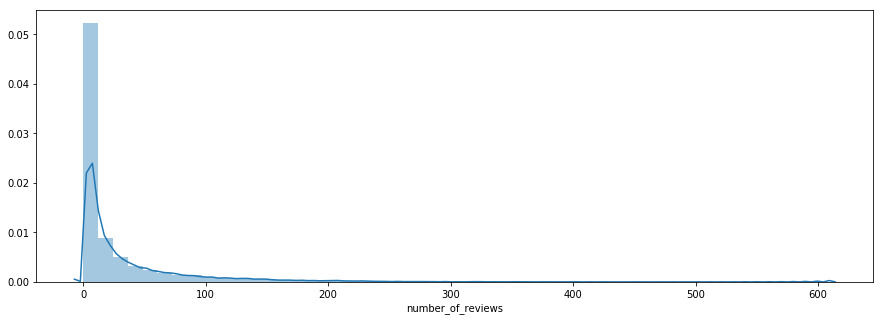

In [17]:
fig = plt.figure(figsize=(15,5))
sns.distplot(airbnb['number_of_reviews'], bins=50);

In [18]:
airbnb['number_of_reviews'].describe()

count    39116.000000
mean        24.750639
std         46.017924
min          0.000000
25%          1.000000
50%          6.000000
75%         26.000000
max        607.000000
Name: number_of_reviews, dtype: float64

<p><b>analisar a coluna "room_type", pois ela parece ser relevante para a análise</b></p>

In [19]:
# analisar a coluna "room_type", pois ela parece ser relevante para a análise
airbnb["room_type"].value_counts() # Essa coluna mostrou bastante potencial como variável qualitativa

Entire home/apt    20905
Private room       17693
Shared room          518
Name: room_type, dtype: int64

<p><b>texto explicando a matriz</b></p>

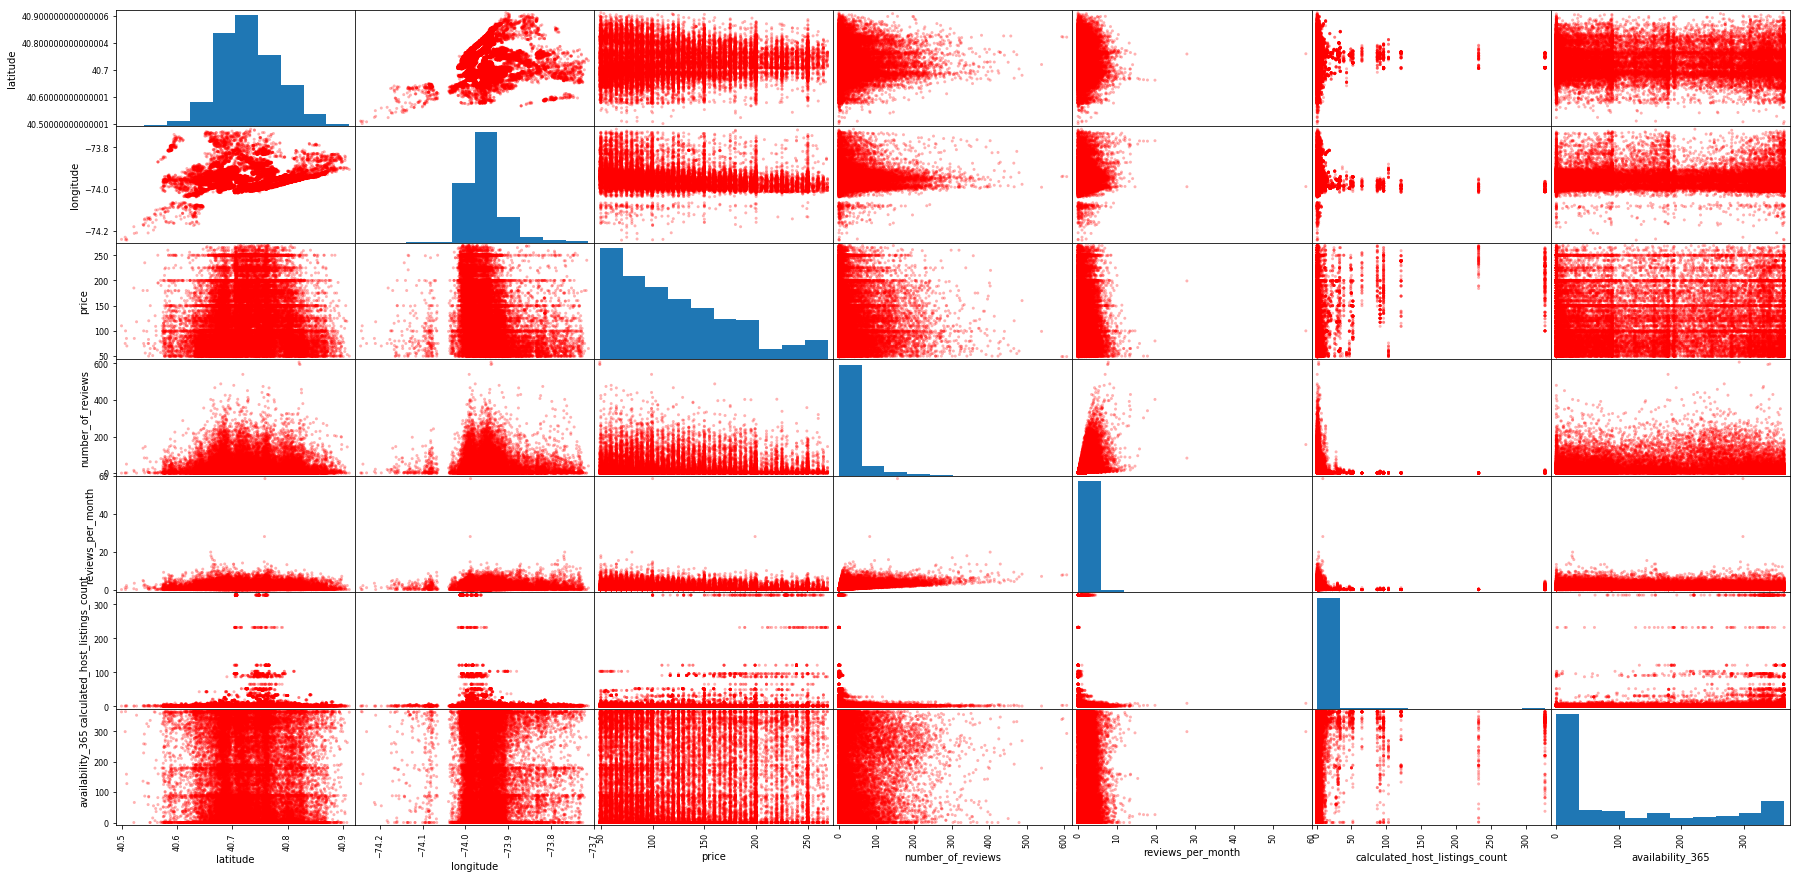

In [20]:
scatter_matrix(airbnb[airbnb.columns], figsize=(30,15), alpha=0.3, c='r')
plt.show();

<p><b>Medindo a Relação entre Variáveis</b></p>

<p style="text-align:justify">
Muitas vezes quando trabalhamos com análise de dados é de grande utilidade medirmos a relação entre duas variáveis, este conceito serve de base para criação de alguns tipos de modelos preditivos, explicando de forma simplificada: se sabemos a relação entre a variável X e a variável Y conseguimos criar um modelo matemático que possuindo apenas novas variáveis de entrada X irá prever a variável de saída Y.
</p>

<p style="text-align:justify">
A medida da força da correlação é expressa como um coeficiente, chamado de coeficiente de correlação de Pearson e ele assume valores entre -1 e 1.
</p>

<ul>
    <li>0.9 a 1.0 positivo ou negativo indica uma correlação muito forte;</li>
    <li>0.7 a 0.9 positivo ou negativo indica uma correlação forte;</li>
    <li>0.5 a 0.7 positivo ou negativo indica uma correlação moderada;</li>
    <li>0.3 a 0.5 positivo ou negativo indica uma correlação fraca;</li>
    <li>0 a 0.3 positivo ou negativo indica uma correlação desprezível;</li>
</ul>

<p>Vamos agora explorar a relação entre as variáveis do nosso conjunto de dados:</p>

In [21]:
#gerando uma tabela com a correlação entre todas as variáveis do nosso dataset.
airbnb.corr()

,latitude,longitude,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.079702,0.041032,-0.017075,-0.027416,0.018445,-0.016807
longitude,0.079702,1.000000,-0.278166,0.052656,0.139919,-0.112473,0.103974
price,0.041032,-0.278166,1.000000,-0.039807,-0.065778,0.178494,0.056974
number_of_reviews,-0.017075,0.052656,-0.039807,1.000000,0.590284,-0.066025,0.192175
reviews_per_month,-0.027416,0.139919,-0.065778,0.590284,1.000000,-0.038834,0.177365
calculated_host_listings_count,0.018445,-0.112473,0.178494,-0.066025,-0.038834,1.000000,0.227045
availability_365,-0.016807,0.103974,0.056974,0.192175,0.177365,0.227045,1.000000


<p>Outra forma visual de verificarmos a correlação entre as variáveis:</p>

In [22]:
def plot_corr(df, size=8):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (3*size, 3*size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

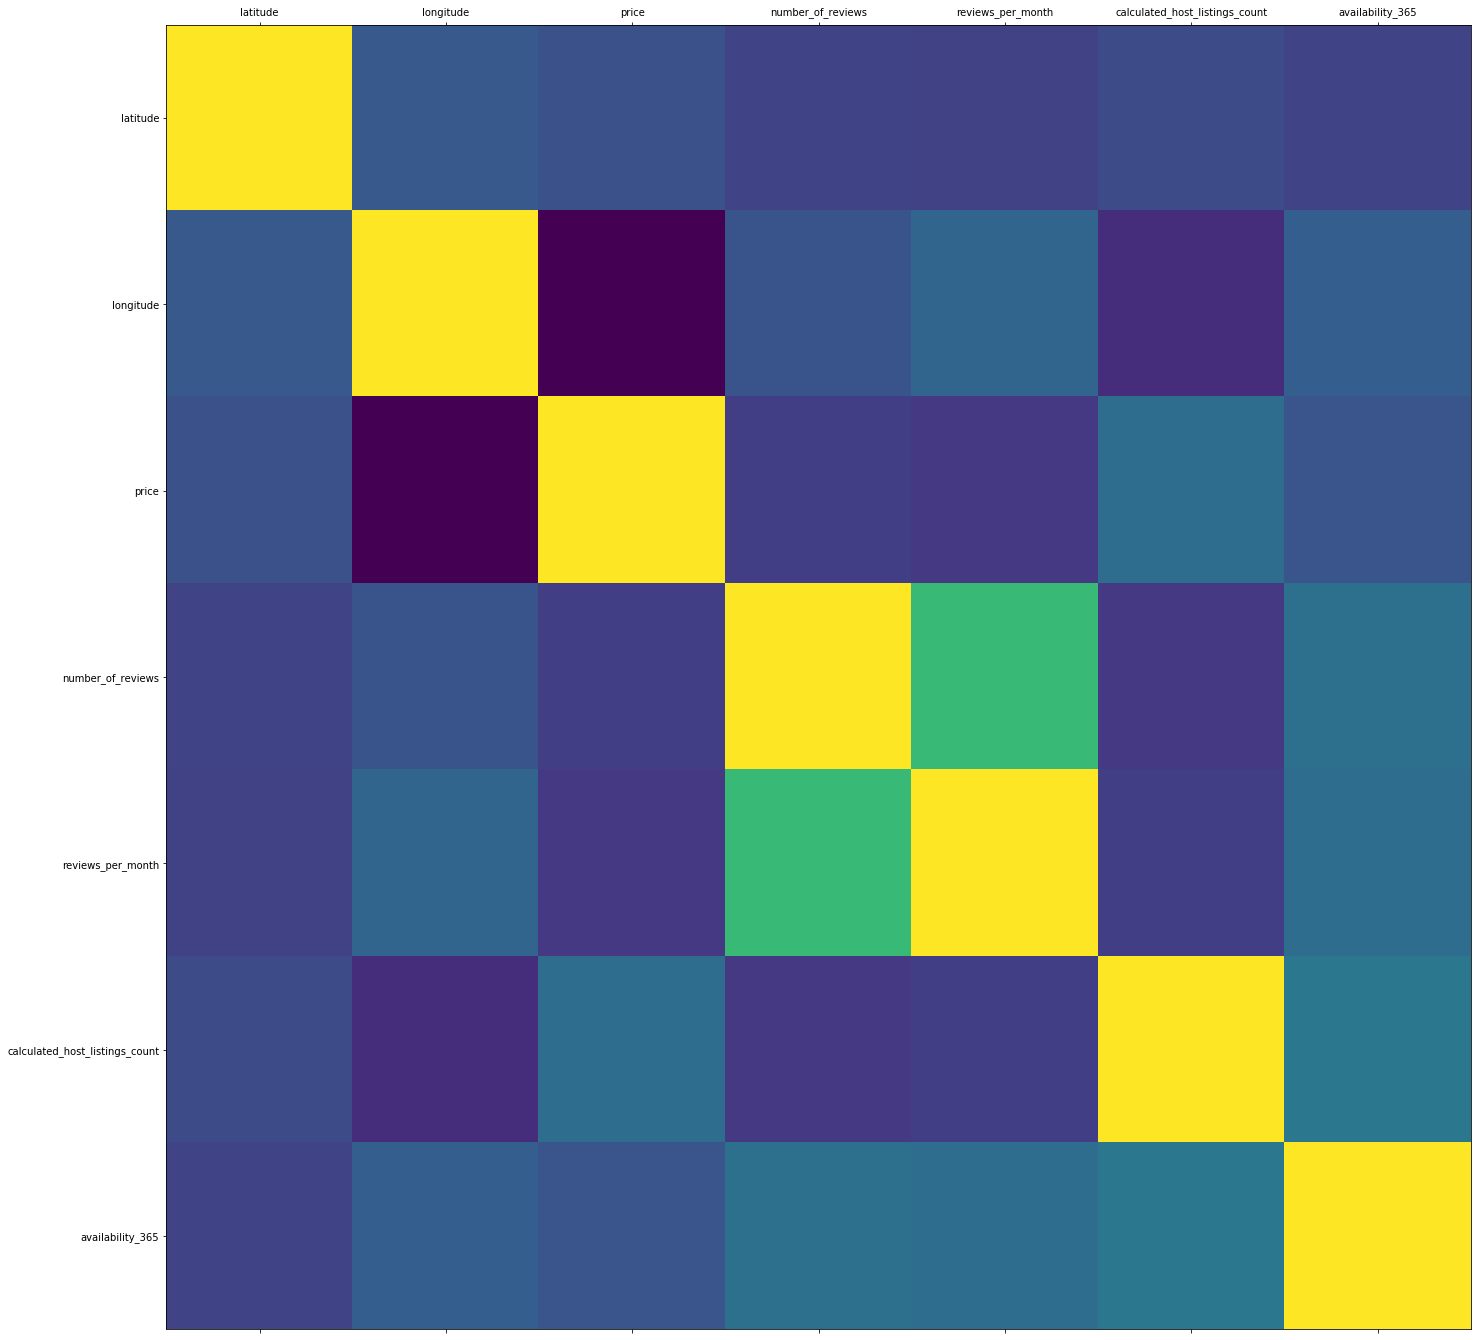

In [23]:
plot_corr(airbnb)

texto explicando as correlações

ANALISE DAS VARIÁVEIS COM ALTA CORRELAÇÃO

In [24]:
airbnb.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace; background-color:rgb(50,50,50); color:rgb(0,255,0); padding:1vh 1vw; border:hidden; border-radius:3px">Separação em treinamento e teste</p>

In [25]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnb, airbnb["room_type"]):
    strat_train_set = airbnb.loc[train_index]
    strat_test_set = airbnb.loc[test_index]

In [26]:
strat_test_set.dropna().shape

(6386, 10)

In [27]:
strat_train_set.dropna().shape

(25435, 10)

In [28]:
airbnb = strat_train_set.dropna().drop("price", axis=1)
airbnb_labels = strat_train_set.dropna()["price"].copy()

In [29]:
airbnb.head(2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
14240,Brooklyn,Williamsburg,40.71690,-73.94714,Private room,0.0,0.0,1.0,0.0
5781,Brooklyn,Crown Heights,40.67658,-73.94440,Private room,0.0,0.0,2.0,83.0


In [30]:
airbnb.shape, airbnb_labels.shape

((25435, 9), (25435,))

In [31]:
num_attribs = list(airbnb.drop(columns=["neighbourhood_group","neighbourhood","room_type"]).columns)
cat_attribs = ["neighbourhood_group","neighbourhood","room_type"]

num_pipeline = Pipeline([
    ( 'selector', DataFrameSelector(num_attribs) ),
    ('imputer', SimpleImputer(strategy="median")),
    ( 'std_scaler', StandardScaler() )
])
cat_pipeline = Pipeline([
    ( 'selector', DataFrameSelector(cat_attribs) ),
    ( 'label_encoder', LabelEncoder())
])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

In [32]:
airbnb_prepared = full_pipeline.fit_transform(airbnb)

In [33]:
airbnb_prepared.shape

(25435, 226)

In [34]:
some_data = airbnb.iloc[:5]

In [35]:
some_labels = airbnb_labels.iloc[:5]

In [36]:
some_data_prepared = full_pipeline.transform(some_data)

<hr><p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace;">Regressão Linear</p><hr>

In [37]:
time_init = time()

lin_reg = LinearRegression()
lin_reg.fit(airbnb_prepared, airbnb_labels)

time_exit = time()
print("Tempo gasto: {:.2f} segundos".format(time_exit - time_init))

Tempo gasto: 0.28 segundos


In [38]:
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 89.40079159  70.19340782 148.4006471   88.20451096 140.00902177]
Labels:		 [100.0, 100.0, 125.0, 72.0, 110.0]


In [39]:
airbnb_predictions = lin_reg.predict(airbnb_prepared)

In [40]:
lin_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

39.87044565205996

In [41]:
time_init = time()
lin_scores = cross_val_score(lin_reg, airbnb_prepared, airbnb_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 2.24 segundos


In [42]:
display_scores(lin_rmse_scores)

Scores: [40.99958269 39.59808086 39.28530601 40.16385842 39.7533474  40.07034703
 40.4975069  40.60331372 40.92574639 40.59944941]
Mean: 40.24965388238885
Standard deviation: 0.5448581253032384


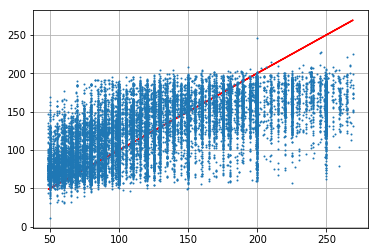

In [43]:
plt.plot(airbnb_labels, airbnb_labels, 'r-', markersize=2)
plt.plot(airbnb_labels, airbnb_predictions, '.', markersize=2)
plt.grid(True)
plt.show()

<hr><p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace">Regressão Logística</p><hr>

In [44]:
time_init = time()

log_reg = LogisticRegression()
log_reg.fit(airbnb_prepared, airbnb_labels)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 24.14 segundos


In [45]:
print("Predictions:\t", log_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 60.  50. 150.  65. 125.]
Labels:		 [100.0, 100.0, 125.0, 72.0, 110.0]


In [46]:
time_init = time()

log_rmse_scores = cross_val_score(log_reg, airbnb_prepared, airbnb_labels,
                             scoring="neg_mean_squared_error", cv=10)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 189.79 segundos


In [47]:
display_scores(log_rmse_scores)

Scores: [-2388.30041619 -2160.61403509 -2191.58595549 -2230.34947695
 -2204.06533646 -2160.32386588 -2319.89608313 -2203.82850242
 -2430.84266018 -2222.37090164]
Mean: -2251.2177233423354
Standard deviation: 90.29777283103348


In [48]:
airbnb_predictions = log_reg.predict(airbnb_prepared)

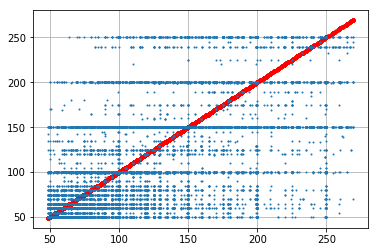

In [49]:
plt.plot(airbnb_labels, airbnb_labels, 'r.')
plt.plot(airbnb_labels, airbnb_predictions, '.', markersize=2)
plt.grid(True)
plt.show()

<hr><p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace">Decision Tree</p><hr>

In [50]:
time_init = time()

tree_reg = DecisionTreeRegressor()
tree_reg.fit(airbnb_prepared, airbnb_labels)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 1.87 segundos


In [51]:
print("Predictions:\t", tree_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [100. 100. 125.  72. 110.]
Labels:		 [100.0, 100.0, 125.0, 72.0, 110.0]


In [52]:
airbnb_predictions = tree_reg.predict(airbnb_prepared)

In [53]:
tree_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [54]:
time_init = time()

scores = cross_val_score(tree_reg, airbnb_prepared, airbnb_labels,
    scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 15.26 segundos


In [55]:
display_scores(rmse_scores)

Scores: [55.76531575 51.94846185 53.03653659 53.54515229 53.0703261  54.26946284
 53.91522744 54.91845025 52.89485337 53.43458079]
Mean: 53.679836726590494
Standard deviation: 1.0374941158654356


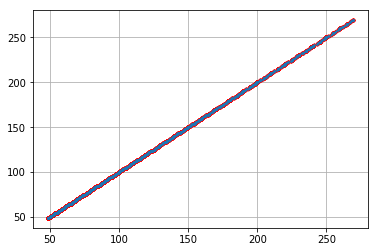

In [56]:
plt.plot(airbnb_labels, airbnb_labels, 'r.', markersize=5)
plt.plot(airbnb_labels, airbnb_predictions, '.', markersize=2)
plt.grid(True)
plt.show()

<hr><p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace">Random Forest</p><hr>

In [57]:
time_init = time()

forest_reg = RandomForestRegressor()
forest_reg.fit(airbnb_prepared, airbnb_labels)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 11.88 segundos


In [58]:
time_init = time()

forest_rmse_scores = cross_val_score(forest_reg, airbnb_prepared, airbnb_labels,
                             scoring="neg_mean_squared_error", cv=10)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 100.57 segundos


In [59]:
print("Predictions:\t", forest_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [109.5  97.8 133.2  73.8 129. ]
Labels:		 [100.0, 100.0, 125.0, 72.0, 110.0]


In [60]:
display_scores(forest_rmse_scores)

Scores: [-1740.53136792 -1631.24647406 -1569.72522013 -1640.77074292
 -1606.10178852 -1674.67666142 -1728.82892646 -1692.32313803
 -1728.19308297 -1714.87770743]
Mean: -1672.7275109872767
Standard deviation: 55.47608369670371


In [61]:
airbnb_predictions = forest_reg.predict(airbnb_prepared)

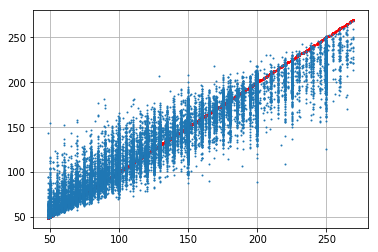

In [62]:
plt.plot(airbnb_labels, airbnb_labels, 'r.', markersize=3)
plt.plot(airbnb_labels, airbnb_predictions, '.', markersize=2)
plt.grid(True)
plt.show()